In this notebook, I will create all the tables/figures for the mauscript (turned out not all of them are generated here! some are produced by Rstudio). Specifically,

1. Characterise online menu healthiness
2. Characterise menu healthiness of all food outlets across the UK
3. Examine the relationship between area of deprivation and neighborhood menu healthiness

# 1. Menu healthiness of food outlets on JE

## Distribution of ratings

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# import data
je_summary = pd.read_csv('JustEat_extracted_220422_lsoa.csv')
je_summary.head()

,Restaurant ID,Desserts,Vegetables,Salads,Chips,Water,Milk,Special Offers,rest_name,address,...,ru11ind,oac11,lat,long,lep1,lep2,pfa,imd,calncv,stp
0,80603,0,5,2,11,1,0,5,Pasha Kebabs & Pizzas,"25 Windmill Brae, Aberdeen, AB11 6HU",...,1,2B1,57.144885,-2.102373,S99999999,S99999999,S23000009,3228.0,S99999999,S99999999
1,71703,10,10,2,14,1,0,4,Paco's Tacos,"42-44 Market Street, Aberdeenshire, AB11 5PL",...,1,2B1,57.146069,-2.096881,S99999999,S99999999,S23000009,3265.0,S99999999,S99999999
2,6885,0,17,12,1,0,0,2,Dil Se,"Unit 8, The Green Berrymuir Road, Portlethen, ...",...,3,6A3,57.056581,-2.140509,S99999999,S99999999,S23000009,5955.0,S99999999,S99999999
3,122605,7,10,6,44,0,0,1,Mannofield Pizza Grill and Kebab,"483a Great Western Road, Aberdeen, AB10 6NN",...,1,5B2,57.132002,-2.135351,S99999999,S99999999,S23000009,6786.0,S99999999,S99999999
4,44832,0,17,2,1,0,0,2,Lasan Healthy Indian Brasserie,"Unit 2 Westhill Drive, Westhill, Aberdeenshire...",...,2,6B3,57.152738,-2.274791,S99999999,S99999999,S23000009,6635.0,S99999999,S99999999


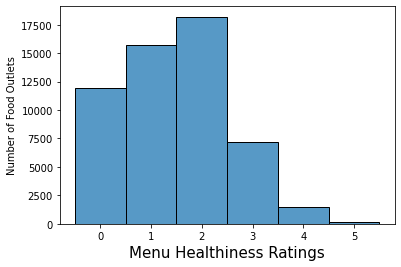

In [ ]:
p = sns.histplot(data= je_summary, x="rating2",discrete=True)
p.set_xlabel("Menu Healthiness Ratings", fontsize = 15)
p.set_ylabel("Number of Food Outlets", fontsize = 10)
plt.savefig('JE_menuhealthiness_distr.png', dpi=300)

In [ ]:
c = je_summary.rating2.value_counts(dropna=False)
p = je_summary.rating2.value_counts(dropna=False, normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
2,18206,0.333596
1,15700,0.287678
0,11907,0.218177
3,7163,0.131251
4,1465,0.026844
5,134,0.002455


## Distribution of ratings, by cuisine tags

In [ ]:
# most popular cuisine tags
from itertools import chain
cuisine_list = list(chain.from_iterable(je_summary.cuisines.str.split(',')))

In [ ]:
Counter(cuisine_list).most_common(20)

[('Pizza', 12332),
 ('Halal', 10636),
 ('Indian', 9045),
 ('Burgers', 7716),
 ('Kebab', 7100),
 ('Chicken', 6390),
 ('Breakfast', 5574),
 ('Curry', 5269),
 ('Chinese', 4662),
 ('Desserts', 3879),
 ('American', 3828),
 ('Italian', 3750),
 ('Fish & Chips', 3682),
 ('Sandwiches', 3477),
 ('Oriental', 2210),
 ('Lunch', 1901),
 ('British', 1646),
 ('Grill', 1213),
 ('Thai', 1192),
 ('Turkish', 1144)]

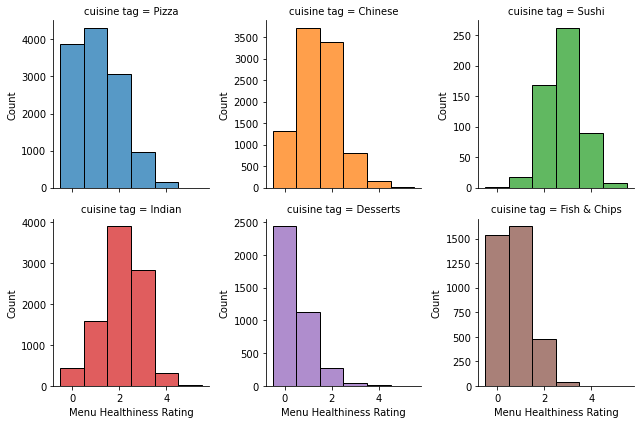

In [ ]:
# Let's compare the menu healthiness ratings of different cuisine tags
def cat_subset(cuisine_tag):
  food_cat = je_summary[je_summary.cuisines.str.contains(cuisine_tag)]
  return(food_cat.rating2)

pizza = cat_subset("Pizza")
indian = cat_subset("Indian")
chinese = cat_subset("Chinese")
desserts = cat_subset('Desserts')
british = cat_subset('British')
sushi = cat_subset("Sushi")
chicken = cat_subset("Chicken")
burger = cat_subset("Burger")
fishchips = cat_subset('Fish & Chips')


df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'Menu Healthiness Rating': pizza, 'cuisine tag': 'Pizza'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': chinese, 'cuisine tag': 'Chinese'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': sushi, 'cuisine tag': 'Sushi'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': indian, 'cuisine tag': 'Indian'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': chinese, 'cuisine tag': 'Chinese'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': desserts, 'cuisine tag': 'Desserts'}),
    pd.DataFrame.from_dict({'Menu Healthiness Rating': fishchips, 'cuisine tag': 'Fish & Chips'})

])

g = sns.FacetGrid(df, col="cuisine tag", col_wrap=3,hue="cuisine tag",margin_titles=True,
                  sharey=False)
g.map(sns.histplot, "Menu Healthiness Rating",discrete=True)
plt.savefig('JE_menuhealthiness_distr_bycat.png', dpi=300)

# 2. Menu healthiness of predicted scores of all food outlets

In [ ]:
# read matched data
import pandas as pd
poi = pd.read_csv('POI_predicted_matchedLSOA_fastai_220722.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
poi.shape

(177926, 70)

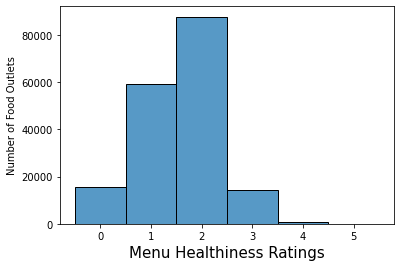

In [ ]:
p = sns.histplot(data= poi, x="rating",discrete=True)
p.set_xlabel("Menu Healthiness Ratings", fontsize = 15)
p.set_ylabel("Number of Food Outlets", fontsize = 10)
plt.savefig('POI_menuhealthiness_distr.png', dpi=300)

In [ ]:
poi.head()

,V1,ref_no,name,pointx_class,feature_easting,feature_northing,pos_accuracy,uprn,topo_toid,topo_toid_version,...,oac11,lat,long,lep1,lep2,pfa,imd,calncv,stp,rating
0,1,18857205,Welcome Break (Charnock Richard),1020043,354292.7,415048.2,1,1.112586e-308,osgb1000037990682,8,...,1B1,53.631499,-2.690751,E37000019,NaN,E23000003,22291,E56000018,E54000048,2
1,2,20078819,Welcome Break (Hartshead Moor),1020043,416830.0,424112.0,1,0.000000e+00,osgb1000031997248,5,...,1B1,53.714327,-1.746460,E37000062,NaN,E23000010,20304,E56000030,E54000054,1
2,3,18857213,Welcome Break (Leicester Forest East),1020043,453839.0,302654.0,1,1.112539e-308,osgb5000005161729586,1,...,6B1,52.619002,-1.206122,E37000021,NaN,E23000021,23065,E56000024,E54000015,2
3,4,18857223,Welcome Break (Warwick Northbound),1020043,433887.1,257699.7,1,1.112562e-308,osgb1000017044508,11,...,1A3,52.219853,-1.515881,E37000006,NaN,E23000017,16796,E56000007,E54000018,2
4,5,18857202,Welcome Break (Abington),1020043,292990.0,625056.0,1,1.112537e-308,osgb1000036194809,14,...,1A3,55.507502,-3.695989,S99999999,S99999999,S23000009,1908,S99999999,S99999999,1


In [ ]:
poi.columns

Index(['V1', 'ref_no', 'name', 'pointx_class', 'feature_easting',
       'feature_northing', 'pos_accuracy', 'uprn', 'topo_toid',
       'topo_toid_version', 'usrn', 'usrn_mi', 'distance', 'address_detail',
       'street_name', 'locality', 'geographic_county', 'postcode',
       'admin_boundary', 'telephone_number', 'url', 'brand', 'qualifier_type',
       'qualifier_data', 'provenance', 'supply_date', 'type',
       'rest_name_space', 'predicted_score', 'pcd', 'pcd2', 'dointr', 'doterm',
       'usertype', 'oseast1m', 'osnrth1m', 'osgrdind', 'oa11', 'cty', 'ced',
       'laua', 'ward', 'hlthau', 'nhser', 'ctry', 'rgn', 'pcon', 'eer',
       'teclec', 'ttwa', 'pct', 'itl', 'park', 'lsoa11', 'msoa11', 'wz11',
       'ccg', 'bua11', 'buasd11', 'ru11ind', 'oac11', 'lat', 'long', 'lep1',
       'lep2', 'pfa', 'imd', 'calncv', 'stp', 'rating'],
      dtype='object')

In [ ]:
# 95%CI for the average score
import math

stats = poi['predicted_score'].agg(['mean', 'count', 'std'])
print(stats)
m, c, s = stats
print(m + 1.96*s/math.sqrt(c))
print(m - 1.96*s/math.sqrt(c))

mean          6.723904
count    177926.000000
std           0.976042
Name: predicted_score, dtype: float64
6.728439398537136
6.719368825666635


In [ ]:
# what about the coverage between 4 to 8?
n_range = poi.loc[(poi['predicted_score']>=4) & (poi['predicted_score']<=8)].shape[0]

print(f'There are {poi.shape[0]} food outlets, among them {n_range} fall between 4 and 8')

There are 177926 food outlets, among them 161761 fall between 4 and 8


In [ ]:
n_range/poi.shape[0]

0.9091476231691827

In [ ]:
poi['pointx_class'].unique()

array([1020043, 1020013, 1020034, 1020018, 1020019, 1020020])

now let's create a new label to group 0018, 0019, and 0020 together.

    * 0013 Cafes, snack bars and tea rooms
    * 0018 Fast food and takeaway outlets
    * 0019 Fast food delivery services
    * 0020 Fish and chip shops
    * 0034 Pubs, bars and inns
    * 0043 Restaurants


In [ ]:
poi.loc[poi['pointx_class'] == 1020013, 'type'] = 'Cafes, snack bars, and tea rooms'
poi.loc[poi['pointx_class'] == 1020034, 'type'] = 'Pubs, bars and inns'
poi.loc[poi['pointx_class'] == 1020043, 'type'] = 'Restaurants'
poi.loc[poi['pointx_class'].isin([1020018,1020019,1020020]),'type'] = 'Fast food and takeaways'

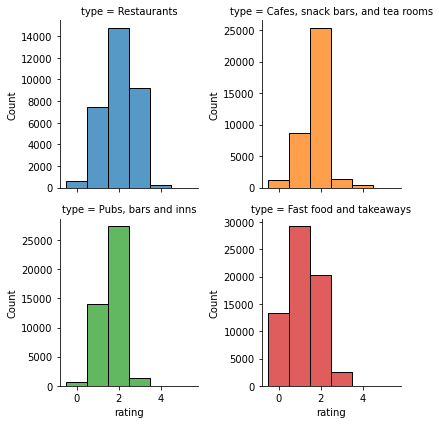

In [ ]:
m = sns.FacetGrid(poi, col="type", hue="type",margin_titles=True,
                  sharey=False,col_wrap=2)
m.map(sns.histplot, "rating",discrete=True)

In [ ]:
medians_to_add = pd.DataFrame(poi.groupby(['type']).predicted_score.median()).reset_index()
medians_to_add = medians_to_add.sort_values('predicted_score',ascending = False)

In [ ]:
# average healthiness by type of food outlets

stats = poi.groupby(['type'])['predicted_score'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                                      mean  count       std   ci95_hi  \
type                                                                    
Cafes, snack bars, and tea rooms  6.923487  37089  0.790295  6.931530   
Fast food and takeaways           6.196414  65330  0.994301  6.204038   
Pubs, bars and inns               6.876745  43344  0.624232  6.882622   
Restaurants                       7.359227  32163  0.985121  7.369993   

                                   ci95_lo  
type                                        
Cafes, snack bars, and tea rooms  6.915444  
Fast food and takeaways           6.188789  
Pubs, bars and inns               6.870868  
Restaurants                       7.348460  


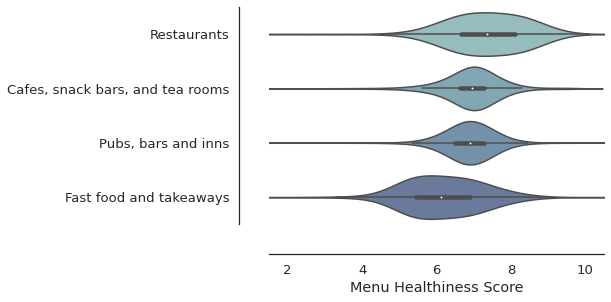

In [ ]:
import numpy as np

sns.set_style('white')

palette = sns.cubehelix_palette(start=.5, rot=-.5, dark=0.3, light=0.7)

# Draw a nested boxplot to show bills by day and time
ax = sns.violinplot(y="type", x="predicted_score",
            data=poi, palette =palette, order=['Restaurants','Cafes, snack bars, and tea rooms',
                                            'Pubs, bars and inns','Fast food and takeaways'],
                    bw=0.5, scale='width')
ax.set_xlim(xmin=1.5, xmax=10.5)
ax.set(ylabel='', xlabel='Menu Healthiness Score')
sns.despine(offset=30)

plt.show()

In [ ]:
#sns.despine(offset=10, trim=True)
p.set_xlim(xmin=1.5, xmax=10.5)
# plt.scatter(x='type',y='predicted_score',data= medians_to_add,color='red')
plt.tight_layout()
# plt.savefig('ViolinPlot_byType.png',dpi=300)
# plt.xticks(rotation=15)
# plt.text('Restaurants',7.0,'3.2', color='red')

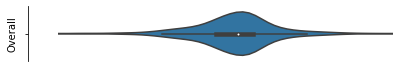

In [ ]:
# overall distribution
plt.figure(figsize=(6,1))
p_overall = sns.violinplot(x="predicted_score",scale='width',data=poi,bw=0.3)
p_overall.set_xlim(xmin=3, xmax=10)
sns.despine(offset=30, bottom=True)
p_overall.set(ylabel='Overall', xlabel='')
# p_overall.spines.bottom.set_visible(False) #Remove both axes
p_overall.get_xaxis().set_visible(False)



In [ ]:
# using ranks -> what would it look like?
poi['predicted_rank'] = poi['predicted_score'] .rank()

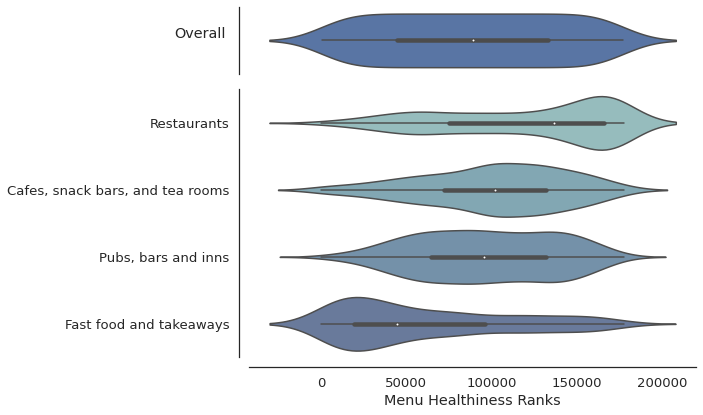

In [ ]:
sns.set(style='white', font_scale=1.2)
# now can I combine these two together??
fig, axs = plt.subplots(2,1,figsize=(10,6), gridspec_kw={'height_ratios': [1, 4]})
p_overall = sns.violinplot(x="predicted_rank",scale='width',data=poi, ax=axs[0])
p = sns.violinplot(y="type", x="predicted_rank",scale='width',
            data=poi, palette =palette, order=['Restaurants','Cafes, snack bars, and tea rooms',
                                            'Pubs, bars and inns','Fast food and takeaways'],
                    bw=0.3, ax=axs[1])
# p_overall.set_xlim(xmin=2, xmax=10)
# p.set_xlim(xmin=2, xmax=10)
sns.despine(offset={'left':10,'bottom':0}, bottom=True, ax=axs[0])
sns.despine(offset={'left':10,'top':0,'bottom':10},ax=axs[1])
# p_overall.set_ylabels('Overall',rotation=90)
p_overall.set_ylabel("Overall", rotation=0, horizontalalignment='right')
# p_overall.set(ylabel='Overall', xlabel='')
p_overall.get_xaxis().set_visible(False)
p.set(ylabel='', xlabel='Menu Healthiness Ranks')
plt.tight_layout()
plt.savefig('ViolinPlot_combined_Ranks.png',dpi=300)


In [ ]:
# Create ranks for the violin plo

In [ ]:
sns.histplot(x="predicted_score",data=poi)
axs[1] = sns.violinplot(y="type", x="predicted_score",scale='width',
            data=poi, palette = "Set2", order=['Restaurants','Cafes and tea rooms',
                                            'Pubs, bars and inns','Fast food and takeaways'],
                    bw=0.3)
axs[0].set_xlim(xmin=3, xmax=10)
axs[1].set_xlim(xmin=3, xmax=10)
axs[0].set(ylabel='Overall', xlabel='')
sns.despine(offset=30)

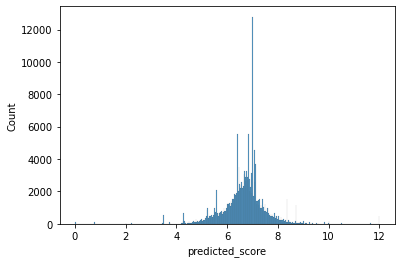

# 3. Menu Healthiness on LSOA level (England)

In [ ]:
!pip install geopandas
import geopandas as gpd
lsoa_imd = gpd.read_file('https://opendata.arcgis.com/datasets/4ad3e5a10872455eaa67ce4e663d0d01_0.geojson')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 15.2 MB/s 
     |████████████████████████████████| 7.8 MB 65.7 MB/s 
     |████████████████████████████████| 16.6 MB 42.1 MB/s 


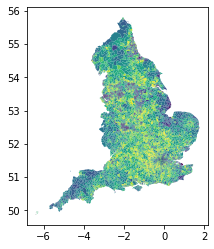

In [ ]:
# Plot the boundaries
lsoa_imd.plot('IMD_Rank')

now group the menu healthiness data at LSOA level too!

In [ ]:
import numpy as np
lsoa_summary = poi.groupby('lsoa11').agg(total_n = ("ref_no", len),
                                             average_healthiness=('predicted_score','mean'),
                                             median_healthiness = ('predicted_score','median'),
                                             over_0 = ('rating',lambda x: (x > 0).sum()),
                                             over_1 = ('rating',lambda x: (x > 1).sum()),
                                             over_2 = ('rating',lambda x: (x > 2).sum()),
                                             over_3 = ('rating',lambda x: (x > 2).sum()),
                                             IMD = ('imd','mean') #IMD scores should be the same
                                             )
lsoa_summary.head()

,total_n,average_healthiness,median_healthiness,over_0,over_1,over_2,over_3,IMD
lsoa11,,,,,,,,
E01000001,22,7.418428,7.622742,21,15,7,7,29199.0
E01000002,38,7.168400,6.956416,38,26,8,8,30379.0
E01000003,4,6.547482,6.758483,3,2,0,0,14915.0
E01000005,89,7.484605,7.390774,89,75,21,21,8678.0
E01000007,10,6.323170,6.292825,9,4,0,0,7256.0


In [ ]:
lsoa_summary['over_0_percent'] = lsoa_summary['over_0']/lsoa_summary['total_n']
lsoa_summary['over_1_percent'] = lsoa_summary['over_1']/lsoa_summary['total_n']
lsoa_summary['over_2_percent'] = lsoa_summary['over_2']/lsoa_summary['total_n']
lsoa_summary['over_3_percent'] = lsoa_summary['over_3']/lsoa_summary['total_n']

In [ ]:
# create deciles
lsoa_summary['Menu Healthiness Deciles'] = pd.qcut(lsoa_summary['average_healthiness'], 10,
                               labels = False)

In [ ]:
lsoa_summary['healthiness_rank'] = lsoa_summary['average_healthiness'].rank(method='dense', ascending=False)

In [ ]:
lsoa_imd_menu = lsoa_imd.merge(lsoa_summary, how='left',right_on='lsoa11',left_on='lsoa11cd')

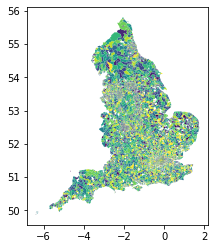

In [ ]:
lsoa_imd_menu.plot('Menu Healthiness Deciles')

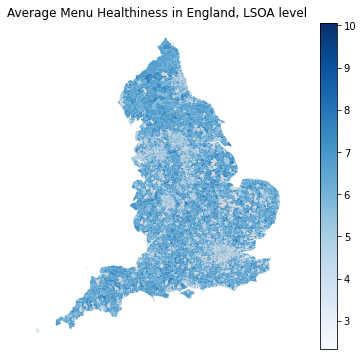

In [ ]:
import matplotlib.pyplot as plt

def create_map(col_name, dat, title):
  fig, ax = plt.subplots(1, figsize=(10, 6))
  dat.plot(column=col_name, ax=ax, cmap='Blues',missing_kwds={'color': 'lightgrey'})
  ax.axis('off')
  vmin = dat[col_name].min()
  vmax = dat[col_name].max()
  # Create colorbar
  sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
  sm._A = []
  cbar = fig.colorbar(sm)
  plt.title(title)

create_map(col_name='average_healthiness',dat =lsoa_imd_menu, title='Average Menu Healthiness in England, LSOA level')

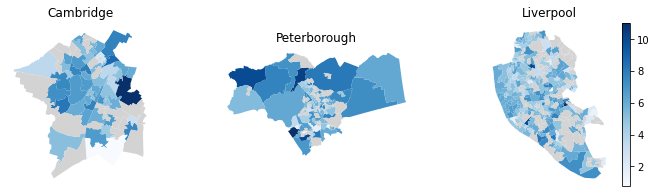

In [ ]:
# now plot Cambridge, Liverpool, and Peterborough
fig, ax = plt.subplots(1,3, figsize=(12, 3),subplot_kw=dict(aspect='equal'))
vmin = lsoa_imd_menu['average_healthiness'].min()
vmax = lsoa_imd_menu['average_healthiness'].max()
areas = ['Cambridge','Peterborough','Liverpool']
# for each panel in the plot
for i, ax_ in enumerate(ax):
  dat_forplot = lsoa_imd_menu[lsoa_imd_menu['LADnm']==areas[i]]
  dat_forplot.plot(column='average_healthiness', ax=ax_, cmap='Blues',missing_kwds={'color': 'lightgrey'})
  ax_.axis('off')
  ax_.set_title(areas[i])
# Create colorbar
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
plt.savefig('Locations_LSOA.png')

# Menu Healthiness on the Local Authority level

## poi data (all)

In [ ]:
!pip install geopandas
import geopandas as gpd
la_b= gpd.read_file('https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Local_Authority_Districts_December_2021_GB_BGC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson',
                    crs='4326')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ERROR:fiona._env:`/vsimem/b5b53f4393bb478d8695108dda072204' not recognized as a supported file format.


DriverError: ignored

In [ ]:
la_b

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry
0,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,1,9.377150e+07,68370.932528,a0067727-6c25-4d75-bbe3-839cf676a069,"MULTIPOLYGON (((-1.22472 54.62609, -1.22494 54..."
1,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,2,5.385857e+07,43639.803302,449ea171-0cf1-4f7e-bfd2-4a204eda5ff3,"MULTIPOLYGON (((-1.27712 54.54791, -1.27720 54..."
2,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,3,2.451429e+08,94929.157179,f5a51119-846e-4757-b327-73b4be205345,"MULTIPOLYGON (((-1.20098 54.57763, -1.20037 54..."
3,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,4,2.049023e+08,117933.766279,6c7f0974-4974-4793-9d56-56e9fd814184,"MULTIPOLYGON (((-1.27154 54.55378, -1.27197 54..."
4,E06000005,Darlington,,428029,515648,-1.56835,54.53534,5,1.974890e+08,105775.139973,9f91263d-693a-442d-b20d-91a0cd0631bb,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670..."
...,...,...,...,...,...,...,...,...,...,...,...,...
358,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.69836,359,1.262231e+08,78980.290566,6e6ba2e5-38cc-48d6-ad6e-52a675a80e94,"POLYGON ((-3.10597 51.79548, -3.09636 51.79155..."
359,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.77827,360,8.503370e+08,219069.227195,213c9584-4784-40ee-b115-c1cbc6c88e36,"MULTIPOLYGON (((-2.78092 51.52605, -2.78124 51..."
360,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.58231,361,1.904457e+08,148337.324444,02234c54-5db2-49de-8ecf-ffe8611321f2,"MULTIPOLYGON (((-2.94483 51.62124, -2.94478 51..."
361,W06000023,Powys,Powys,302329,273255,-3.43531,52.34864,362,5.195417e+09,590030.508611,ae549f63-3af8-49c8-8afd-f96cdb021e38,"MULTIPOLYGON (((-3.90623 52.56080, -3.90861 52..."


In [ ]:
region_lookup = pd.read_csv('Local_Authority_District_to_Region_(April_2021)_Lookup_in_England.csv')
region_lookup.head()

,FID,LAD21CD,LAD21NM,RGN21CD,RGN21NM
0,1,E06000001,Hartlepool,E12000001,North East
1,2,E06000011,East Riding of Yorkshire,E12000003,Yorkshire and The Humber
2,3,E06000002,Middlesbrough,E12000001,North East
3,4,E06000003,Redcar and Cleveland,E12000001,North East
4,5,E06000012,North East Lincolnshire,E12000003,Yorkshire and The Humber


In [ ]:
greater_london_lad21cd = region_lookup[region_lookup.RGN21NM=='London'].LAD21CD
print(len(greater_london_lad21cd.values)) # 33 LAs in London

33


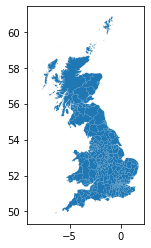

In [ ]:
la_b.plot()

In [ ]:
la_b.head()

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry
0,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,1,9.377150e+07,68370.932528,a0067727-6c25-4d75-bbe3-839cf676a069,"MULTIPOLYGON (((-1.22472 54.62609, -1.22494 54..."
1,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,2,5.385857e+07,43639.803302,449ea171-0cf1-4f7e-bfd2-4a204eda5ff3,"MULTIPOLYGON (((-1.27712 54.54791, -1.27720 54..."
2,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,3,2.451429e+08,94929.157179,f5a51119-846e-4757-b327-73b4be205345,"MULTIPOLYGON (((-1.20098 54.57763, -1.20037 54..."
3,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,4,2.049023e+08,117933.766279,6c7f0974-4974-4793-9d56-56e9fd814184,"MULTIPOLYGON (((-1.27154 54.55378, -1.27197 54..."
4,E06000005,Darlington,,428029,515648,-1.56835,54.53534,5,1.974890e+08,105775.139973,9f91263d-693a-442d-b20d-91a0cd0631bb,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670..."


In [ ]:
la_summary = poi.groupby('laua').agg(average_healthiness=('predicted_score','mean'))
la_summary

,average_healthiness
laua,
E06000001,6.419596
E06000002,6.492459
E06000003,6.532163
E06000004,6.520742
E06000005,6.609346
...,...
W06000020,6.488375
W06000021,6.736383
W06000022,6.682410


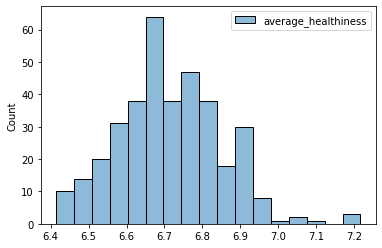

In [ ]:
sns.histplot(la_summary)

In [ ]:
la_menu = la_b.merge(la_summary, how='left',right_on='laua',left_on='LAD21CD')

In [ ]:
la_menu.head()

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness
0,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,1,9.377150e+07,68370.932528,a0067727-6c25-4d75-bbe3-839cf676a069,"MULTIPOLYGON (((-1.22472 54.62609, -1.22494 54...",6.419596
1,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,2,5.385857e+07,43639.803302,449ea171-0cf1-4f7e-bfd2-4a204eda5ff3,"MULTIPOLYGON (((-1.27712 54.54791, -1.27720 54...",6.492459
2,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,3,2.451429e+08,94929.157179,f5a51119-846e-4757-b327-73b4be205345,"MULTIPOLYGON (((-1.20098 54.57763, -1.20037 54...",6.532163
3,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,4,2.049023e+08,117933.766279,6c7f0974-4974-4793-9d56-56e9fd814184,"MULTIPOLYGON (((-1.27154 54.55378, -1.27197 54...",6.520742
4,E06000005,Darlington,,428029,515648,-1.56835,54.53534,5,1.974890e+08,105775.139973,9f91263d-693a-442d-b20d-91a0cd0631bb,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670...",6.609346


In [ ]:
# the top and lowest healthiness local authority districts
la_menu.nlargest(3, 'average_healthiness')

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness
276,E09000001,City of London,,532382,181358,-0.09351,51.51564,277,2.884707e+06,9017.740855,b0dd1589-01a2-4fe7-a108-e7d58d4f40ee,"MULTIPOLYGON (((-0.10415 51.50854, -0.10468 51...",7.216663
295,E09000020,Kensington and Chelsea,,525756,179058,-0.18977,51.49648,296,1.214398e+07,20725.468310,8fc0bc87-40a0-4f03-b907-db70a0c1ee9a,"POLYGON ((-0.22756 51.53015, -0.22766 51.52991...",7.199752
308,E09000033,Westminster,,528268,180871,-0.15295,51.51221,309,2.145632e+07,26979.357612,d54ae8b8-3b6f-4df3-831b-31a0793ee786,"POLYGON ((-0.17413 51.53826, -0.17348 51.53765...",7.184164


In [ ]:
# how many
poi.loc[poi.laua=='E09000001'].shape

(1112, 70)

In [ ]:
la_menu.nsmallest(3, 'average_healthiness')

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness
11,E06000012,North East Lincolnshire,,523465,404564,-0.13911,53.52327,12,1.927129e+08,90908.159797,14f794c5-90de-41c9-b924-befd75704a1c,"MULTIPOLYGON (((-0.06401 53.58380, -0.06538 53...",6.414127
29,E06000032,Luton,,508606,222559,-0.42319,51.89102,30,4.335904e+07,34269.124934,4844b403-4da0-479f-a6e2-cc3cb9f2aad4,"POLYGON ((-0.42604 51.92669, -0.42168 51.92568...",6.418983
9,E06000010,"Kingston upon Hull, City of",,511894,431650,-0.30382,53.76920,10,7.161086e+07,64230.595255,5e181cf8-ee7b-4010-84a3-063e4a8ed957,"MULTIPOLYGON (((-0.24313 53.73831, -0.24433 53...",6.419477


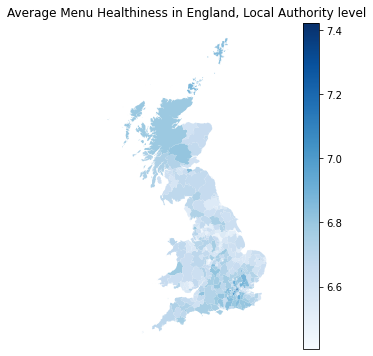

In [ ]:
# absolute healthiness - all quite close
create_map(col_name='average_healthiness',dat =la_menu, title='Average Menu Healthiness in England, Local Authority level')

In [ ]:
# deciles of rannking
la_menu['Menu Healthiness Deciles'] = pd.qcut(la_menu['average_healthiness'], 10,
                                              labels =['Q1 (the least healthy)','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10 (the most healthy)'])

In [ ]:
!pip install mapclassify

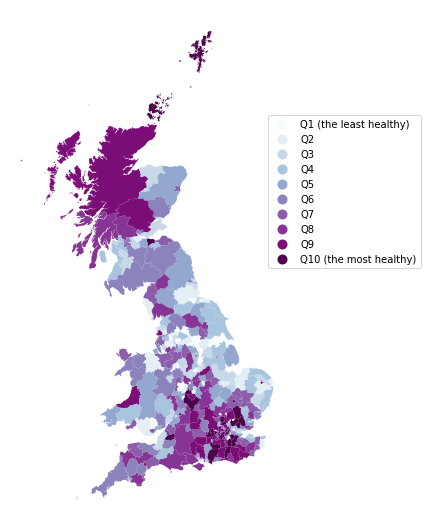

In [ ]:
# create maps with Deciles (not for continous variable)
ax=la_menu.plot(column='Menu Healthiness Deciles', figsize=(5,10),
             cmap='BuPu', legend=True, legend_kwds={'bbox_to_anchor': (1.5, 0.8)})
ax.set_axis_off()
plt.savefig('LA_poi.png',dpi=300,bbox_inches='tight')

In [ ]:
pd.qcut(la_menu['average_healthiness'], 5)

0      (6.412999999999999, 6.599]
1      (6.412999999999999, 6.599]
2      (6.412999999999999, 6.599]
3      (6.412999999999999, 6.599]
4                  (6.599, 6.676]
                  ...            
358    (6.412999999999999, 6.599]
359                (6.676, 6.749]
360                (6.676, 6.749]
361                 (6.749, 6.82]
362    (6.412999999999999, 6.599]
Name: average_healthiness, Length: 363, dtype: category
Categories (5, interval[float64, right]): [(6.412999999999999, 6.599] < (6.599, 6.676] < (6.676, 6.749] <
                                           (6.749, 6.82] < (6.82, 7.217]]

In [ ]:
la_menu['Menu Healthiness Quintiles'] = pd.qcut(la_menu['average_healthiness'], 5, labels = ['Q1: 6.41-6.60 (the least healthy)',
                                                                                             'Q2: 6.60-6.68',
                                                                                             'Q3: 6.68-6.75',
                                                                                             'Q4: 6.75-6.82',
                                                                                             'Q5: 6.82-7.22 (the most healthy)'])

In [ ]:
la_menu.head()

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness,Menu Healthiness Quintiles
0,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,1,9.377150e+07,68370.932528,a0067727-6c25-4d75-bbe3-839cf676a069,"MULTIPOLYGON (((-1.22472 54.62609, -1.22494 54...",6.419596,Q1: 6.41-6.60 (the least healthy)
1,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,2,5.385857e+07,43639.803302,449ea171-0cf1-4f7e-bfd2-4a204eda5ff3,"MULTIPOLYGON (((-1.27712 54.54791, -1.27720 54...",6.492459,Q1: 6.41-6.60 (the least healthy)
2,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,3,2.451429e+08,94929.157179,f5a51119-846e-4757-b327-73b4be205345,"MULTIPOLYGON (((-1.20098 54.57763, -1.20037 54...",6.532163,Q1: 6.41-6.60 (the least healthy)
3,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,4,2.049023e+08,117933.766279,6c7f0974-4974-4793-9d56-56e9fd814184,"MULTIPOLYGON (((-1.27154 54.55378, -1.27197 54...",6.520742,Q1: 6.41-6.60 (the least healthy)
4,E06000005,Darlington,,428029,515648,-1.56835,54.53534,5,1.974890e+08,105775.139973,9f91263d-693a-442d-b20d-91a0cd0631bb,"POLYGON ((-1.63800 54.61720, -1.63767 54.61670...",6.609346,Q2: 6.60-6.68


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
!pip install matplotlib-scalebar
from matplotlib_scalebar.scalebar import ScaleBar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


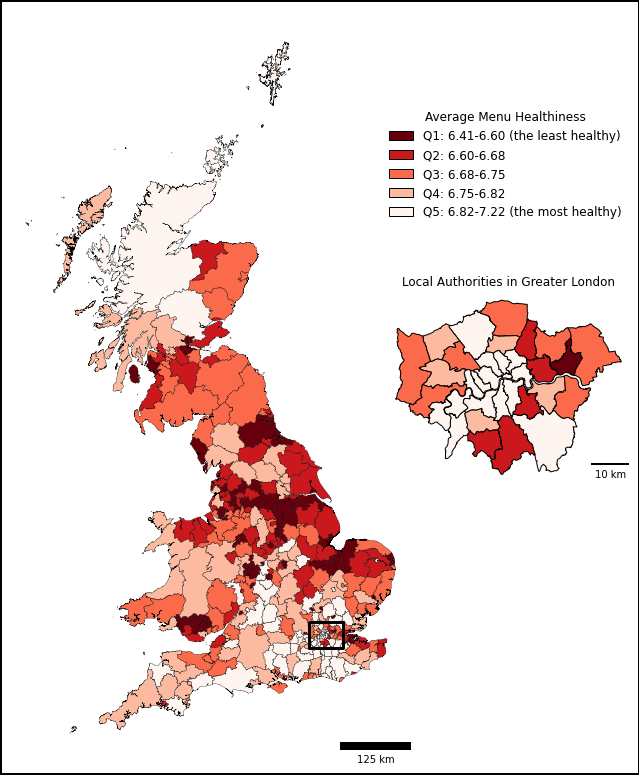

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(12,14),gridspec_kw={'width_ratios': [2, 1]},edgecolor='black')
red_reversed = matplotlib.cm.get_cmap('Reds_r', 5)
la_menu = la_menu.to_crs(27700)
p1 = la_menu.plot(column='Menu Healthiness Quintiles', figsize=(8,14), ax=axs[0],
             cmap=red_reversed,edgecolor='black', linewidth=0.3)

# add boarder around patches
from matplotlib.patches import Patch
colors = ['#67000d','#cb181d','#fb6a4a','#fcbba1', '#fff5f0']
labels = ['Q1: 6.41-6.60 (the least healthy)','Q2: 6.60-6.68','Q3: 6.68-6.75','Q4: 6.75-6.82','Q5: 6.82-7.22 (the most healthy)']
outline_handles = [Patch(facecolor=color, edgecolor='black', label=label) for color, label in zip(colors, labels)]
leg = plt.legend(handles=outline_handles,title='Average Menu Healthiness',bbox_to_anchor=(1,2), prop={'size': 12}, title_fontsize=12)
leg.get_frame().set_linewidth(0.0)
handles, labels = p1.get_legend_handles_labels()

p1.add_artist(ScaleBar(1, location='lower right'))
p1.set_frame_on(False)
# plt.legend(frameon=False)
p1.set_xticks([])
p1.set_yticks([])
df2.plot(edgecolor='black',facecolor="none", linewidth=3, ax=axs[0])

p2= london_la_menu.plot(column='Menu Healthiness Quintiles', figsize=(8,12),
             cmap=red_reversed, legend=False,edgecolor='black', ax=axs[1])
p2.add_artist(ScaleBar(1, location='lower right'))
p2.set_frame_on(False)
p2.set_title('Local Authorities in Greater London')
p2.set_xticks([])
p2.set_yticks([])

fig.patch.set_linewidth(4)
fig.patch.set_edgecolor('black')

plt.subplots_adjust(wspace=-0.2)

# fig.set_tight_layout(True)
# plt.axis('off')
plt.savefig('LA_all_171022.png',dpi=300,bbox_inches='tight', edgecolor=fig.get_edgecolor())

In [ ]:
red_reversed = matplotlib.cm.get_cmap('Reds_r', 5)

for i in range(red_reversed.N):
    rgba = red_reversed(i)
    # rgb2hex accepts rgb or rgba
    print(matplotlib.colors.rgb2hex(rgba))

#67000d
#cb181d
#fb6a4a
#fcbba1
#fff5f0


In [ ]:
la_menu.head()

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness,Menu Healthiness Quintiles
0,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,1,9.377150e+07,68370.932528,a0067727-6c25-4d75-bbe3-839cf676a069,"MULTIPOLYGON (((450152.656 525937.171, 450138....",6.442007,Q1: 6.40-6.58
1,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,2,5.385857e+07,43639.803302,449ea171-0cf1-4f7e-bfd2-4a204eda5ff3,"MULTIPOLYGON (((446859.128 517201.694, 446853....",6.497497,Q1: 6.40-6.58
2,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,3,2.451429e+08,94929.157179,f5a51119-846e-4757-b327-73b4be205345,"MULTIPOLYGON (((451746.472 520562.536, 451786....",6.560787,Q1: 6.40-6.58
3,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,4,2.049023e+08,117933.766279,6c7f0974-4974-4793-9d56-56e9fd814184,"MULTIPOLYGON (((447213.317 517859.310, 447185....",6.583103,Q2: 6.58-6.64
4,E06000005,Darlington,,428029,515648,-1.56835,54.53534,5,1.974890e+08,105775.139973,9f91263d-693a-442d-b20d-91a0cd0631bb,"POLYGON ((423475.043 524732.657, 423496.547 52...",6.529655,Q1: 6.40-6.58


In [ ]:
london_la_menu = la_menu.loc[la_menu['LAD21CD'].isin(greater_london_lad21cd.values)]

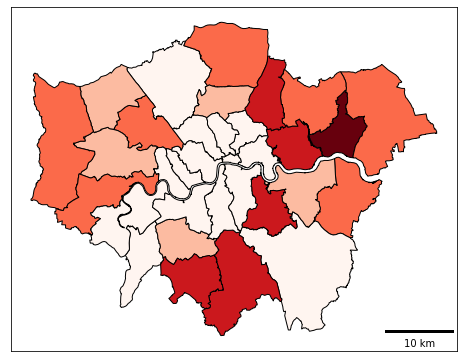

In [ ]:
ax2= london_la_menu.plot(column='Menu Healthiness Quintiles', figsize=(8,12),
             cmap=red_reversed, legend=False,edgecolor='black')
ax2.add_artist(ScaleBar(1, location='lower right'))
ax2.set_xticks([])
ax2.set_yticks([])
plt.savefig('London_all.png',dpi=300,bbox_inches='tight')

In [ ]:
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

bbox = london_la_menu.total_bounds

p1 = Point(bbox[0], bbox[3])
p2 = Point(bbox[2], bbox[3])
p3 = Point(bbox[2], bbox[1])
p4 = Point(bbox[0], bbox[1])

np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

bb_polygon = Polygon([np1, np2, np3, np4])
df2 = gpd.GeoDataFrame(gpd.GeoSeries(bb_polygon), columns=['geometry'])

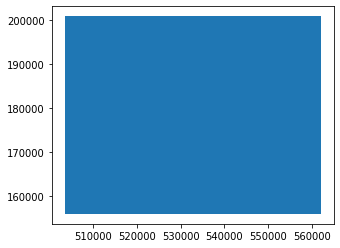

In [ ]:
# create combined plot with a leading line
df2.plot()

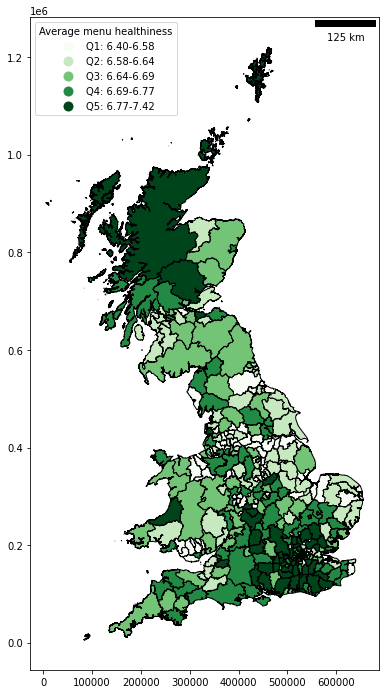

In [ ]:
ax = la_menu.plot(column='Menu Healthiness Quintiles', figsize=(8,12),
             cmap='Greens', legend=True,legend_kwds={'loc': 'upper left'},edgecolor='black')
ax.add_artist(ScaleBar(1))
ax.get_legend().set_title("Average menu healthiness")
plt.savefig('LA_all_je_green.png',dpi=300,bbox_inches='tight')

In [ ]:
# most healthy local authority, least, and median
la_summary = la_summary.sort_values('average_healthiness')
la_summary.head(), la_summary.tail()

(           average_healthiness
 laua                          
 E09000002             6.405874
 E08000030             6.412149
 E06000012             6.435585
 E07000135             6.437089
 E06000008             6.438316,            average_healthiness
 laua                          
 E09000013             6.996394
 E09000007             7.121481
 E09000020             7.196978
 E09000033             7.222705
 E09000001             7.423356)

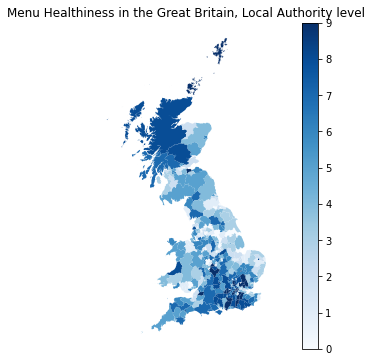

In [ ]:
create_map(col_name='Menu Healthiness Deciles',dat =la_menu, title='Menu Healthiness in the Great Britain, Local Authority level')

In [ ]:
# there is maybe one without matching
la_menu[la_menu['average_healthiness'].isnull()]

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness


## just eat data

In [ ]:
je_summary = pd.read_csv('/content/je_predicted_matchedLSOA.csv')

In [ ]:
la_summary_je = je_summary.groupby('laua').agg(average_healthiness=('predict','mean'))
la_summary_je

,average_healthiness
laua,
E06000001,5.937717
E06000002,5.875407
E06000003,5.851892
E06000004,5.843464
E06000005,6.117268
...,...
W06000020,5.953609
W06000021,7.424242
W06000022,6.223866


In [ ]:
la_menu_je = la_b.merge(la_summary_je, how='left',right_on='laua',left_on='LAD21CD')

In [ ]:
la_menu_je[la_menu_je.average_healthiness.isnull()]

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness
49,E06000053,Isles of Scilly,,91327,11447,-6.30217,49.92332,50,1.634669e+07,1.031852e+05,04a01e07-ad2e-4372-b864-cb5c2f26de76,"MULTIPOLYGON (((-6.39898 49.86490, -6.40050 49...",NaN
68,E07000030,Eden,,359636,526396,-2.62678,54.63107,69,2.156522e+09,2.640251e+05,57d46768-679a-48b3-9992-dd7d51f8d6ed,"POLYGON ((-2.39830 54.84416, -2.39273 54.83452...",NaN
314,S12000013,Na h-Eileanan Siar,,126473,932862,-6.65722,58.19938,315,3.093344e+09,3.407421e+06,94a33a82-8c90-4782-9b12-92dec509a456,"MULTIPOLYGON (((-7.64970 56.78411, -7.64980 56...",NaN
321,S12000023,Orkney Islands,,348293,1006584,-2.90025,58.94334,322,1.015554e+09,1.094647e+06,6c3787ef-c227-4c1f-a6ba-4235e6f2b159,"MULTIPOLYGON (((-2.91137 58.67381, -2.91335 58...",NaN
323,S12000027,Shetland Islands,,434516,1180307,-1.37344,60.50495,324,1.467335e+09,2.046714e+06,1ec464b3-5644-476a-b5c9-052b4a68bf1c,"MULTIPOLYGON (((-1.65078 59.50695, -1.65181 59...",NaN


In [ ]:
la_menu_je = la_menu_je.to_crs(27700)

NameError: ignored

In [ ]:
 pd.qcut(la_menu_je['average_healthiness'],5)

0      (5.266, 6.002]
1      (5.266, 6.002]
2      (5.266, 6.002]
3      (5.266, 6.002]
4      (6.002, 6.306]
            ...      
358    (5.266, 6.002]
359    (6.931, 7.808]
360    (6.002, 6.306]
361    (6.931, 7.808]
362    (5.266, 6.002]
Name: average_healthiness, Length: 363, dtype: category
Categories (5, interval[float64, right]): [(5.266, 6.002] < (6.002, 6.306] < (6.306, 6.626] <
                                           (6.626, 6.931] < (6.931, 7.808]]

In [ ]:
# deciles of rannking

la_menu_je['Menu Healthiness Quintiles'] = pd.qcut(la_menu_je['average_healthiness'], 5, labels = ['Q1: 5.27-6.00 (the least healthy)',
                                                                                             'Q2: 6.00-6.31',
                                                                                             'Q3: 6.31-6.63',
                                                                                             'Q4: 6.63-6.93',
                                                                                             'Q5: 6.93-7.81 (the most healthy)'])


In [ ]:
london_la_menu_je = la_menu_je.loc[la_menu_je['LAD21CD'].isin(greater_london_lad21cd.values)]

In [ ]:
bbox = london_la_menu_je.total_bounds

p1 = Point(bbox[0], bbox[3])
p2 = Point(bbox[2], bbox[3])
p3 = Point(bbox[2], bbox[1])
p4 = Point(bbox[0], bbox[1])

np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

bb_polygon = Polygon([np1, np2, np3, np4])
df2_je = gpd.GeoDataFrame(gpd.GeoSeries(bb_polygon), columns=['geometry'])

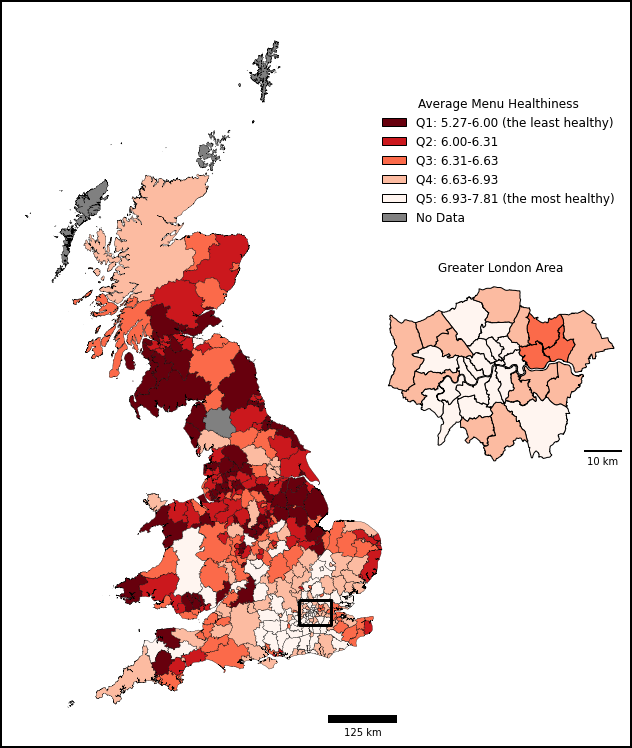

In [ ]:
import matplotlib
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(12,13.5),gridspec_kw={'width_ratios': [2, 1]},edgecolor='black')
red_reversed = matplotlib.cm.get_cmap('Reds_r', 5)
missing_kwds = dict(color='grey', label='No Data')
p1 = la_menu_je.plot(column='Menu Healthiness Quintiles',  figsize=(8,13.5), ax=axs[0],
             cmap=red_reversed,edgecolor='black', linewidth=0.3, missing_kwds=missing_kwds)

# add boarder around patches
from matplotlib.patches import Patch
colors = ['#67000d','#cb181d','#fb6a4a','#fcbba1', '#fff5f0', 'grey']
labels = ['Q1: 5.27-6.00 (the least healthy)','Q2: 6.00-6.31','Q3: 6.31-6.63','Q4: 6.63-6.93','Q5: 6.93-7.81 (the most healthy)','No Data']
outline_handles = [Patch(facecolor=color, edgecolor='black', label=label) for color, label in zip(colors, labels)]
leg = plt.legend(handles=outline_handles,title='Average Menu Healthiness',bbox_to_anchor=(1,2), prop={'size': 12}, title_fontsize=12)
leg.get_frame().set_linewidth(0.0)
handles, labels = p1.get_legend_handles_labels()

p1.add_artist(ScaleBar(1, location='lower right'))
p1.set_frame_on(False)
# plt.legend(frameon=False)
p1.set_xticks([])
p1.set_yticks([])
df2_je.plot(edgecolor='black',facecolor="none", linewidth=3, ax=axs[0])


p2= london_la_menu_je.plot(column='Menu Healthiness Quintiles', figsize=(8,12),
             cmap=red_reversed, legend=False,edgecolor='black', ax=axs[1])
p2.add_artist(ScaleBar(1, location='lower right'))
p2.set_frame_on(False)
p2.set_title('Greater London Area')
p2.set_xticks([])
p2.set_yticks([])

fig.patch.set_linewidth(4)
fig.patch.set_edgecolor('black')

plt.subplots_adjust(wspace=-0.2)

# fig.set_tight_layout(True)
# plt.axis('off')
plt.savefig('LA_JE_141022.png',dpi=300,bbox_inches='tight', edgecolor=fig.get_edgecolor())

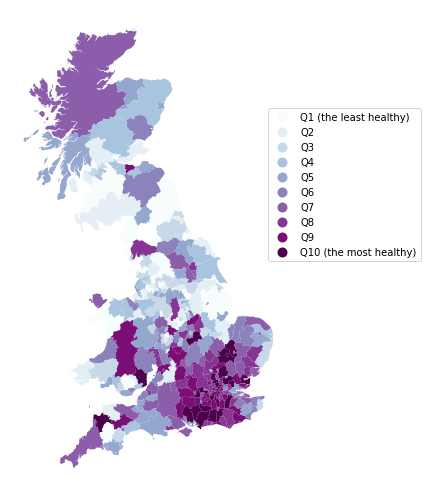

In [ ]:
# create maps with Deciles (not for continous variable)
ax=la_menu_je.plot(column='Menu Healthiness Deciles', figsize=(5,10),
             cmap='BuPu', legend=True, legend_kwds={'bbox_to_anchor': (1.5, 0.8)})
ax.set_axis_off()
plt.savefig('LA_je.png',dpi=300,bbox_inches='tight')

## Combined map (digital & all physical stores)

Combine the two plots with the same legend

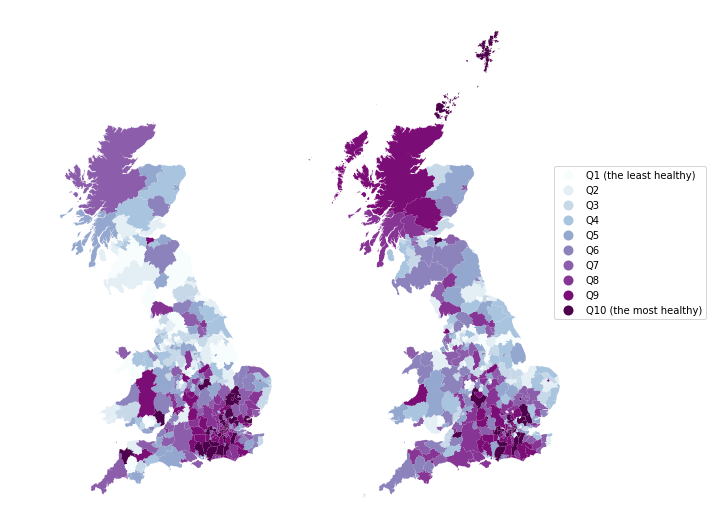

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,20), sharey=True, sharex=True)
fig1 = la_menu_je.plot(column='Menu Healthiness Deciles', ax=axs[0],
             cmap='BuPu')
axs[0].set_axis_off()
la_menu.plot(column='Menu Healthiness Deciles',ax=axs[1],
             cmap='BuPu',legend=True,legend_kwds={'bbox_to_anchor': (1.5, 0.7)})
axs[1].set_axis_off()
plt.savefig('LA_je_poi.png',dpi=300,bbox_inches='tight')

# Menu Healthiness by type of food outlets

Using poi predicted scores

In [ ]:
# normalise the menu healthiness score
def normalize_series(s):
    return (s - s.min()) / (s.max() - s.min())

poi['pred_norm'] = normalize_series(poi['predicted_score'])

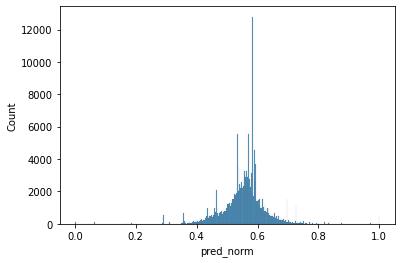

In [ ]:
sns.histplot(poi['pred_norm'])

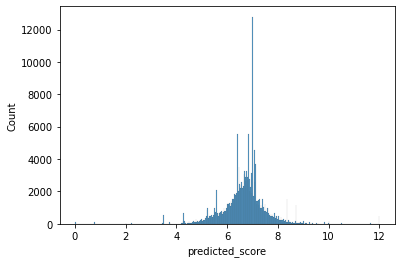

In [ ]:
sns.histplot(poi['predicted_score'])

In [ ]:
la_poi_summary = poi.groupby(['laua','type']).agg(average_healthiness=('predicted_score','mean')).reset_index()

In [ ]:
la_menu_type = la_b.merge(la_poi_summary, how='left',right_on='laua',left_on='LAD21CD')

In [ ]:
for i, col in enumerate(la_poi_summary.type.unique()):
  print(i)
  print(col)

0
Cafes and tea rooms
1
Fast food and takeaways
2
Pubs, bars and inns
3
Restaurants


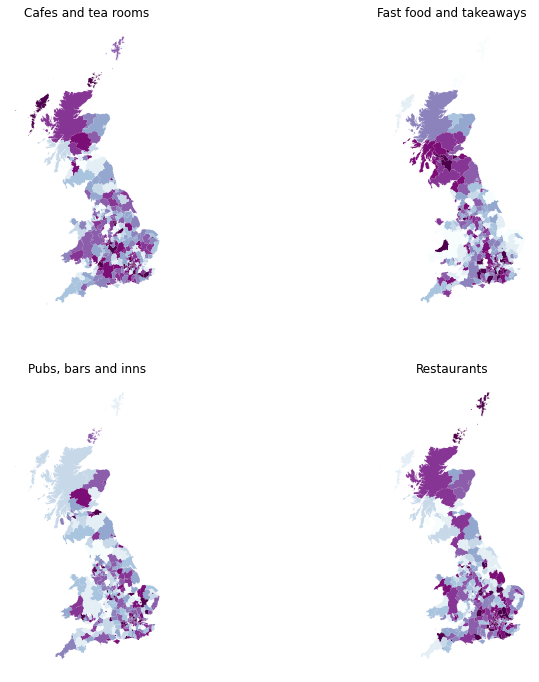

In [ ]:
#!pip install mapclassify

f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(la_poi_summary.type.unique()):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    dat = la_menu_type[la_menu_type['type']==col]
    dat.plot(column='average_healthiness', ax=ax, k=10, scheme = "quantiles",
                      linewidth=0, cmap='BuPu')
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [ ]:
!pip install mapclassify

# IMD & Menu healthiness

Focus in England only

In [ ]:
poi.ctry.value_counts()

E92000001    154038
S92000003     15622
W92000004      8266
Name: ctry, dtype: int64

In [ ]:
England_imd = poi[poi['ctry']=='E92000001']

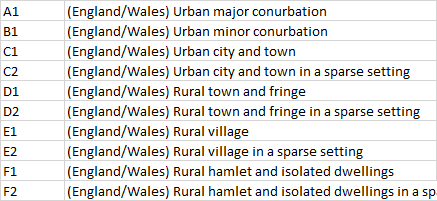

In [ ]:
# Urban rural classification
England_imd.loc[England_imd['ru11ind'].isin(['A1','B1','C1','C2']), 'urban']='Urban'
England_imd.loc[England_imd['ru11ind'].isin(['D1','D2','E1','E2','F1','F2']), 'urban']= 'Rural'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Generalised linear regressions

### IMD rank as numeric

In [ ]:
# use IMD as a continous rank
import statsmodels.formula.api as smf
model_glm = smf.glm(formula='predicted_score~imd+urban',data=England_imd)
model_glm_f =model_glm.fit()
print(model_glm_f.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        predicted_score   No. Observations:               154038
Model:                            GLM   Df Residuals:                   154035
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.85171
Method:                          IRLS   Log-Likelihood:            -2.0621e+05
Date:                Thu, 12 May 2022   Deviance:                   1.3119e+05
Time:                        16:04:52   Pearson chi2:                 1.31e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.5123      0.008    787.

### IMD Deciles

In [ ]:
# deciles of rannking
England_imd['imd_d'] = pd.qcut(England_imd['imd'], 10,
                                              labels =['Q1 (the most deprived)','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10 (the least deprived)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
model_glm2 = smf.glm(formula='predicted_score ~ imd_d +urban',data=England_imd)
model_glm_f2 =model_glm2.fit()
print(model_glm_f2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        predicted_score   No. Observations:               154038
Model:                            GLM   Df Residuals:                   154027
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.85019
Method:                          IRLS   Log-Likelihood:            -2.0607e+05
Date:                Thu, 12 May 2022   Deviance:                   1.3095e+05
Time:                        16:15:15   Pearson chi2:                 1.31e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

#Map for online menu healthiness

In [ ]:
la_menu_je

NameError: ignored

In [ ]:
la_menu_je['Menu Healthiness Quintiles'] = pd.qcut(la_menu_je['average_healthiness'], 5,
                                                   labels = ['Q1: 5.27-6.02 (the least healthy)',
                                                                                             'Q2: 6.02-6.31',
                                                                                             'Q3: 6.31-6.63',
                                                                                             'Q4: 6.63-6.93',
                                                                                             'Q5: 6.93-7.91 (the most healthy)'])

In [ ]:
# add the box for london boundary
london_la_menu_je = la_menu_je.loc[la_menu_je['LAD21CD'].isin(greater_london_lad21cd.values)]

In [ ]:
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

bbox = london_la_menu_je.total_bounds

p1 = Point(bbox[0], bbox[3])
p2 = Point(bbox[2], bbox[3])
p3 = Point(bbox[2], bbox[1])
p4 = Point(bbox[0], bbox[1])

np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

bb_polygon = Polygon([np1, np2, np3, np4])
df2 = gpd.GeoDataFrame(gpd.GeoSeries(bb_polygon), columns=['geometry'])

In [ ]:
# find the missing area
la_menu_je[la_menu_je.average_healthiness.isna()]

,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,OBJECTID,Shape__Area,Shape__Length,GlobalID,geometry,average_healthiness,Menu Healthiness Deciles,Menu Healthiness Quintiles
49,E06000053,Isles of Scilly,,91327,11447,-6.30217,49.92332,50,1.634669e+07,1.031852e+05,04a01e07-ad2e-4372-b864-cb5c2f26de76,"MULTIPOLYGON (((83994.935 5358.276, 83885.024 ...",NaN,NaN,NaN
68,E07000030,Eden,,359636,526396,-2.62678,54.63107,69,2.156522e+09,2.640251e+05,57d46768-679a-48b3-9992-dd7d51f8d6ed,"POLYGON ((374520.085 550000.864, 374871.887 54...",NaN,NaN,NaN
314,S12000013,Na h-Eileanan Siar,,126473,932862,-6.65722,58.19938,315,3.093344e+09,3.407421e+06,94a33a82-8c90-4782-9b12-92dec509a456,"MULTIPOLYGON (((55120.248 780087.659, 55111.74...",NaN,NaN,NaN
321,S12000023,Orkney Islands,,348293,1006584,-2.90025,58.94334,322,1.015554e+09,1.094647e+06,6c3787ef-c227-4c1f-a6ba-4235e6f2b159,"MULTIPOLYGON (((347244.212 976581.277, 347129....",NaN,NaN,NaN
323,S12000027,Shetland Islands,,434516,1180307,-1.37344,60.50495,324,1.467335e+09,2.046714e+06,1ec464b3-5644-476a-b5c9-052b4a68bf1c,"MULTIPOLYGON (((419868.503 1069048.257, 419809...",NaN,NaN,NaN


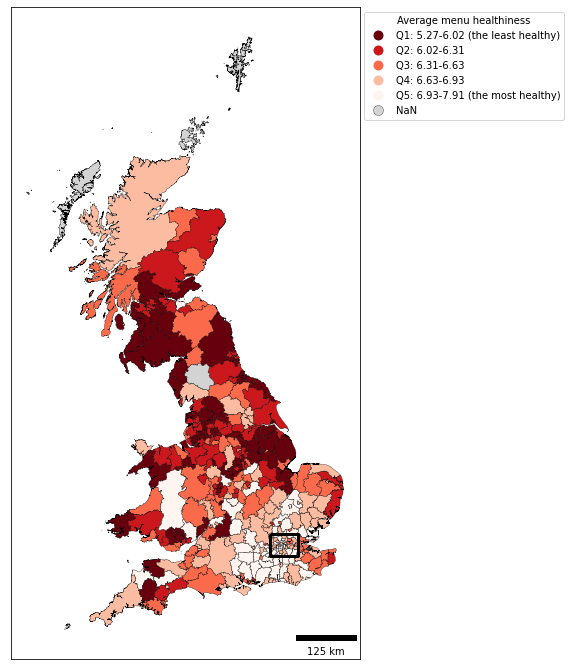

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install matplotlib-scalebar

from matplotlib_scalebar.scalebar import ScaleBar
la_menu_je = la_menu_je.to_crs(27700)
red_reversed = matplotlib.cm.get_cmap('Reds_r')
ax = la_menu_je.plot(column='Menu Healthiness Quintiles', figsize=(8,12),
             cmap=red_reversed, legend=True,missing_kwds= dict(color = "lightgrey",), legend_kwds={'bbox_to_anchor': (1.6,1)},edgecolor='black', linewidth=0.3)
ax.add_artist(ScaleBar(1, location='lower right'))
#plt.legend(frameon=False)
ax.get_legend().set_title("Average menu healthiness")
ax.set_xticks([])
ax.set_yticks([])
df2.plot(edgecolor='black',facecolor="none", linewidth=3, ax=ax)
# plt.axis('off')
plt.savefig('LA_Je_all.png',dpi=300,bbox_inches='tight')

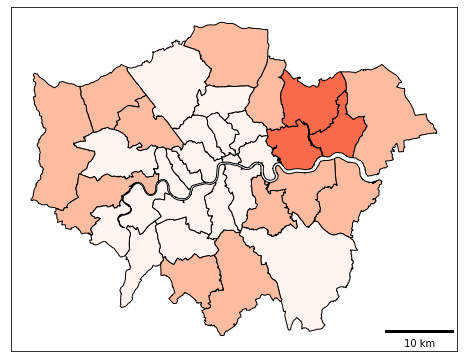

In [ ]:
ax2= london_la_menu_je.plot(column='Menu Healthiness Quintiles', figsize=(8,12),
             cmap=red_reversed, legend=False,edgecolor='black')
ax2.add_artist(ScaleBar(1, location='lower right'))
ax2.set_xticks([])
ax2.set_yticks([])
plt.savefig('London_all_je.png',dpi=300,bbox_inches='tight')

# Comparing online and physical food healthiness

In [ ]:
## Import all the libraries
!pip install unidecode
from unidecode import unidecode
import string
import pandas as pd
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *
import string
import string
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 10.6 MB/s 


In [ ]:
# load the prediction model
from joblib import load

fastai_model = load('/content/model_0_190722_resampled.joblib')

In [ ]:
fastai_model.predict(['Yuru sushi'])

array([10.23485993])

In [ ]:
def rest_name_cleaning(rest_name):
  '''
  This function cleans the restaurant name string
  '''
  rest_name_clean = rest_name.lower()
  rest_name_clean = rest_name_clean.strip()
  ascii_name = unidecode(rest_name_clean)
  ascii_name_fix = ascii_name.replace('`',"'")
  ascii_name_fix = ascii_name_fix.replace('~'," ")
  ascii_name_fix = ascii_name_fix.replace(']'," ")
  ascii_name_fix = ascii_name_fix.replace('['," ")
  ascii_name_fix = ascii_name_fix.replace('\\'," ")
  ascii_name_fix = ascii_name_fix.replace('%'," ")
  ascii_name_fix = ascii_name_fix.replace('*'," ")
  ascii_name_fix = ascii_name_fix.replace('+'," and ")
  ascii_name_fix = ascii_name_fix.replace('&'," and ")
  ascii_name_fix = ascii_name_fix.replace('/'," ")

  return ascii_name_fix

In [ ]:
je_summary['ascii_name_fix'] = je_summary.rest_name.apply(lambda x: rest_name_cleaning(x))


In [ ]:
je_summary['fastai_score'] =  fastai_model.predict(je_summary.ascii_name_fix)

In [ ]:
je_summary.to_excel('je_summary_fastaiscores_211022.xlsx')

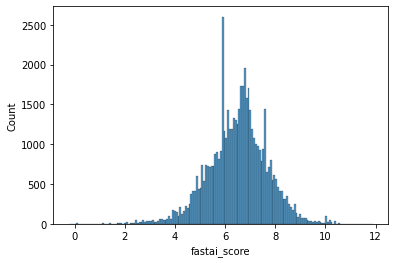

In [ ]:
sns.histplot(je_summary['fastai_score'])

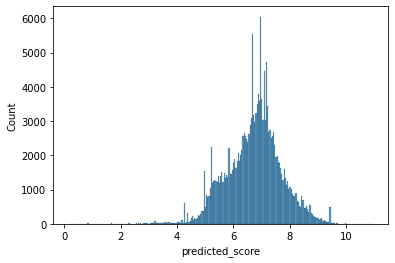

In [ ]:
# Now comparing online and takeaways
sns.histplot(data= poi, x="predicted_score")

In [ ]:
je_summary.loc[je_summary['fastai_score']>12, 'fastai_score'] = 12
je_summary.loc[je_summary['fastai_score']<0, 'fastai_score'] = 0


In [ ]:
poi.loc[poi['predicted_score']>12, 'predicted_score'] = 12
poi.loc[poi['predicted_score']<0, 'predicted_score'] = 0

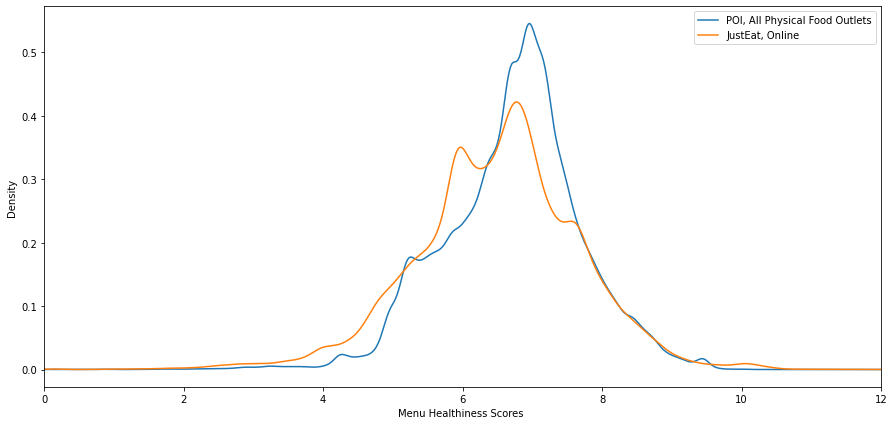

In [ ]:
import matplotlib.pyplot as plt
poi['predicted_score'].plot.density(label='POI, All Physical Food Outlets', figsize=(15,7))
je_summary['fastai_score'].plot.density(label='JustEat, Online')
plt.xlabel('Menu Healthiness Scores ')
plt.xlim(0,12)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


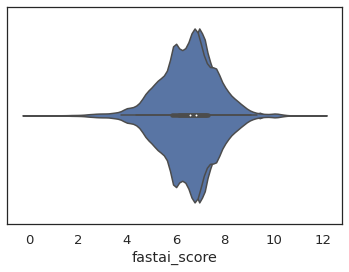

In [ ]:
sns.violinplot(poi['predicted_score'])
sns.violinplot(je_summary['fastai_score'])

In [ ]:
# create a new dataframe for the plot
compare_df1  = pd.DataFrame({'Food Outlets': 'Just Eat', 'Healthiness scores':je_summary['fastai_score'].values})
compare_df2 = pd.DataFrame({'Food Outlets':'All Physical Food Outlets', 'Healthiness scores':poi['predicted_score'].values})

In [ ]:
compare_df = pd.concat([compare_df1, compare_df2], axis=0)

In [ ]:
compare_df.head()

,Food Outlets,Healthiness scores,Healthiness ranks
0,Just Eat,5.587510,34796.0
1,Just Eat,6.795987,120359.0
2,Just Eat,7.844335,206892.5
3,Just Eat,4.947029,11255.0
4,Just Eat,8.774171,228375.0


In [ ]:
compare_df['Healthiness ranks'] = compare_df['Healthiness scores'].rank()

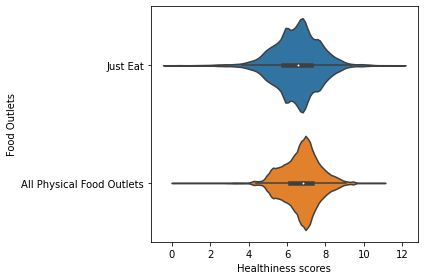

In [ ]:
sns.violinplot(y="Food Outlets", x="Healthiness scores",scale='width',
            data=compare_df)
plt.tight_layout()
plt.savefig('ViolinPlot_Compare_Scores.png',dpi=300)

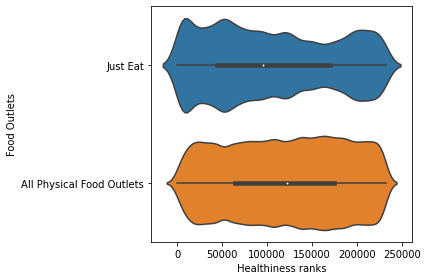

In [ ]:
sns.violinplot(y="Food Outlets", x="Healthiness ranks",scale='width',
            data=compare_df)
plt.tight_layout()
plt.savefig('ViolinPlot_Compare_Ranks.png',dpi=300)

In [ ]:
compare_d